In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

# 1. download the dataset

# 2. Load the dataset

In [42]:
data=pd.read_csv("abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# 3. Perform Below Visualizations.

Univariate Analysis

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
data['age']=data['Rings']+1.5
data=data.drop("Rings", axis = 1)

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

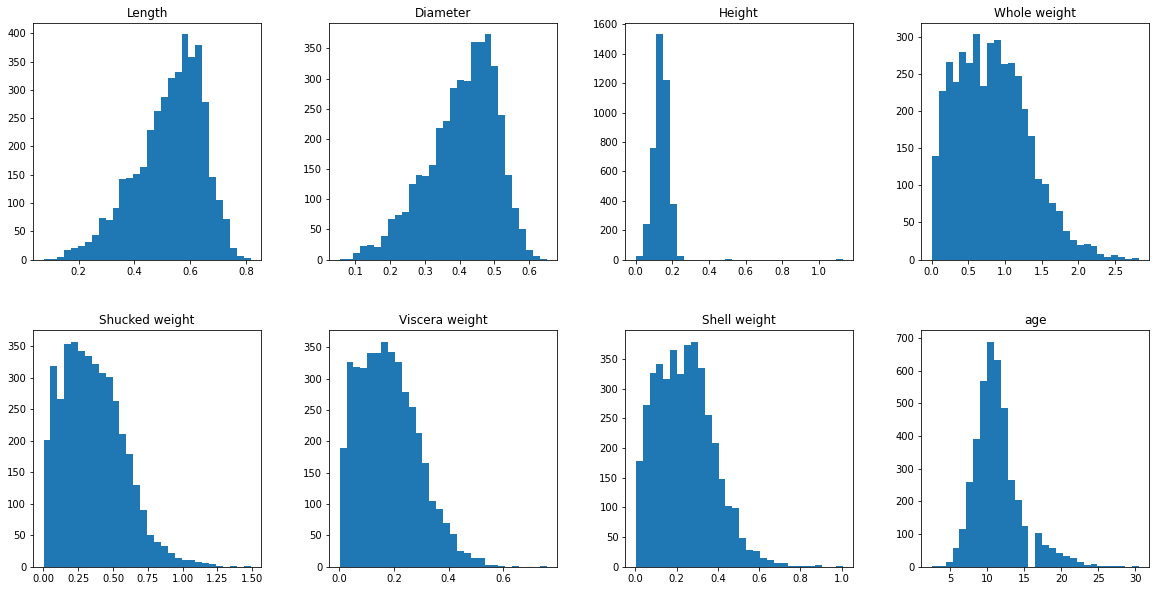

In [46]:
data.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

 Bi-Variate Analysis

In [47]:
data.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age']].mean().sort_values('age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


Multi-Variate Analysis

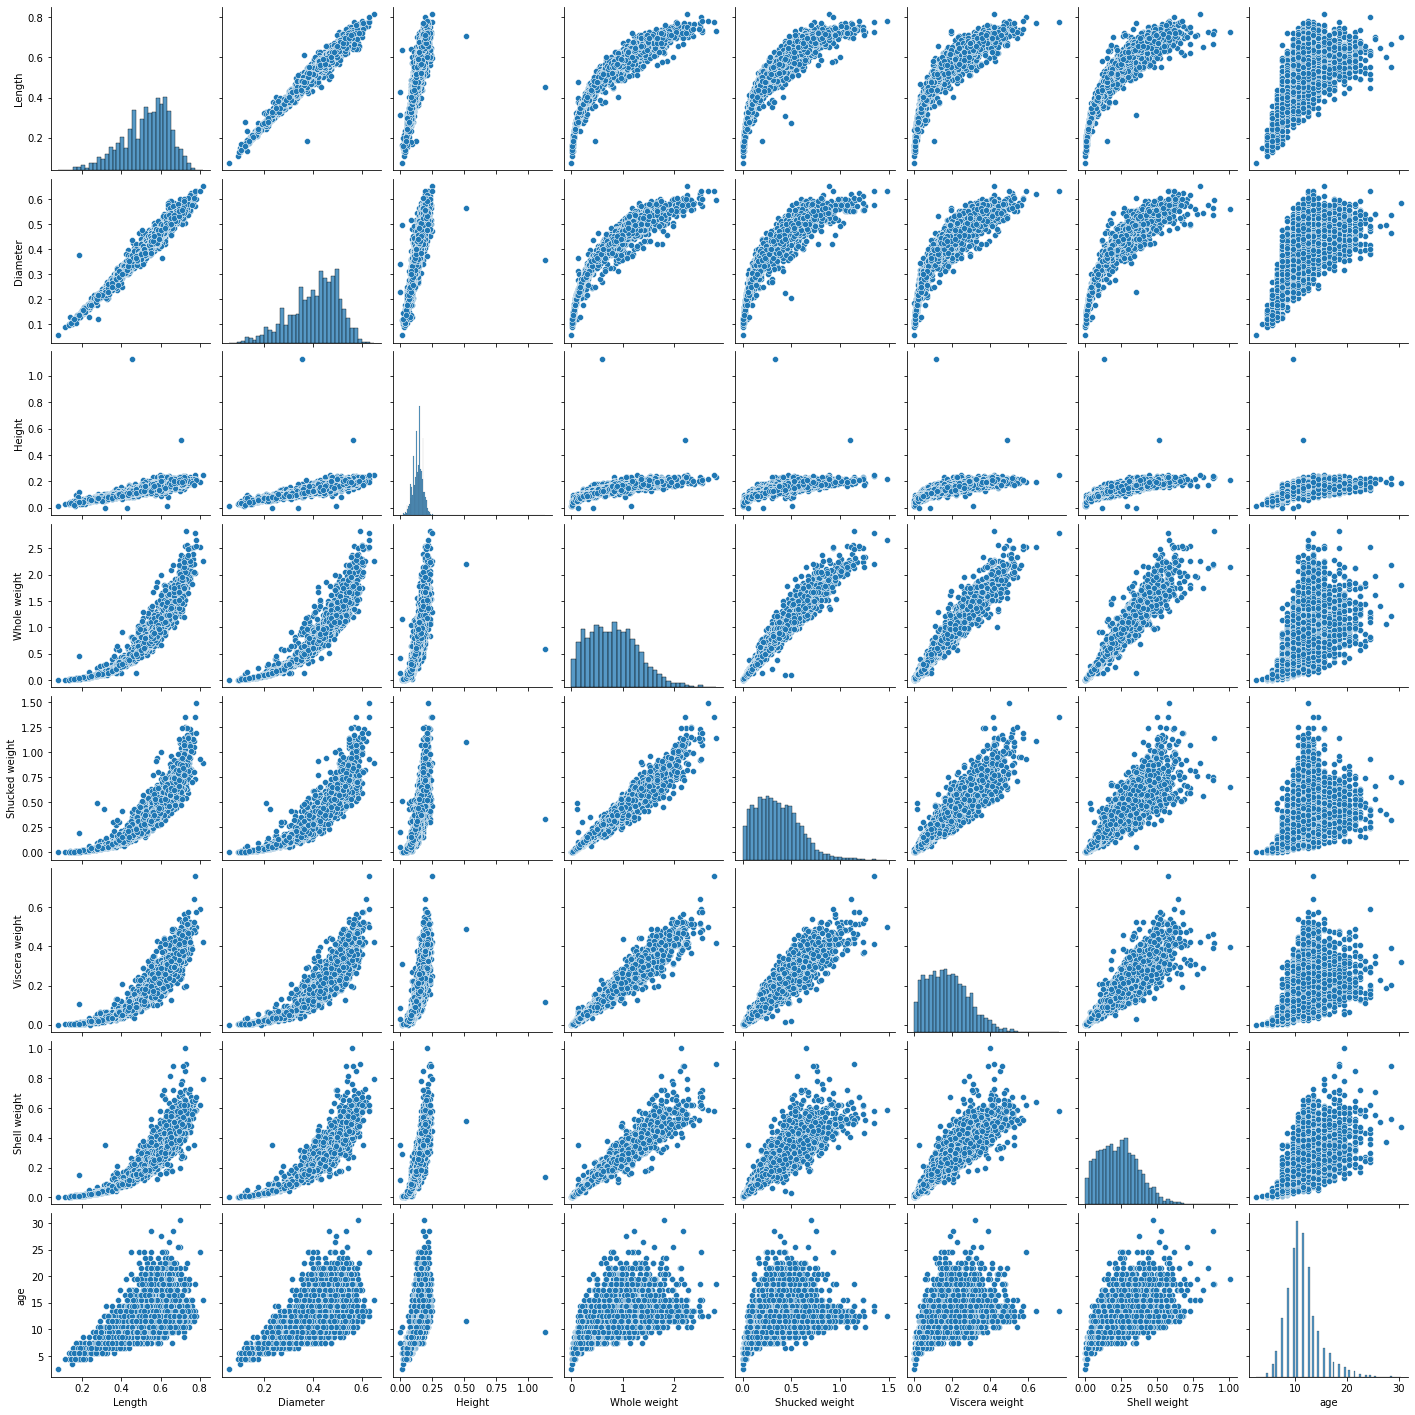

In [48]:
numerical_features = data.select_dtypes(include = [np.number]).columns
sns.pairplot(data[numerical_features])

In [49]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [50]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

In [51]:
data = pd.get_dummies(data)
dummy_data = data.copy()

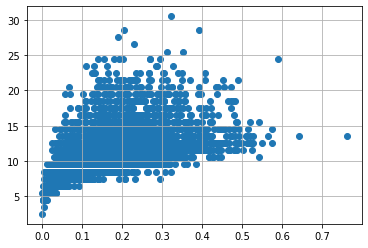

In [52]:
var = 'Viscera weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [53]:
# outliers removal
data.drop(data[(data['Viscera weight']> 0.5) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Viscera weight']<0.5) & (data['age'] > 25)].index, inplace=True)

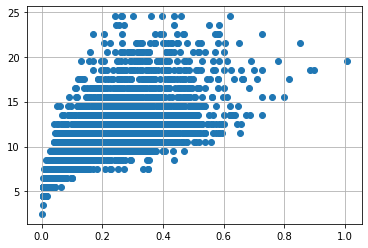

In [54]:
var = 'Shell weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)
#Outliers removal
data.drop(data[(data['Shell weight']> 0.6) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Shell weight']< 0.8) & (data['age'] > 25)].index, inplace=True)


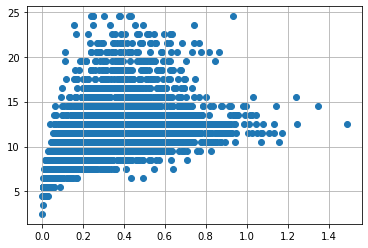

In [55]:
var = 'Shucked weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

#Outlier removal
data.drop(data[(data['Shucked weight']> 1) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Shucked weight']< 1) & (data['age'] > 25)].index, inplace=True)

In [56]:
df=data

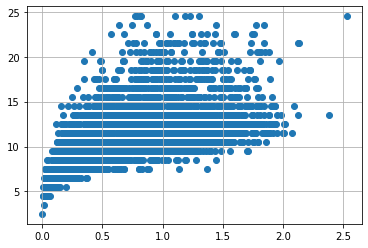

In [57]:
var = 'Whole weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

df.drop(df[(df['Whole weight'] >= 2.5) &
          (df['age'] < 25)].index, inplace = True)
df.drop(df[(df['Whole weight']<2.5) & (
df['age'] > 25)].index, inplace = True)

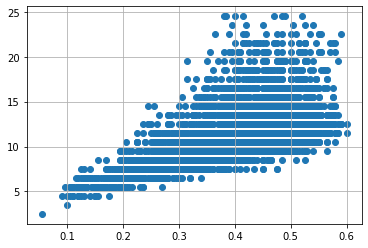

In [58]:
var = 'Diameter'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

df.drop(df[(df['Diameter'] <0.1) &
          (df['age'] < 5)].index, inplace = True)
df.drop(df[(df['Diameter']<0.6) & (
df['age'] > 25)].index, inplace = True)
df.drop(df[(df['Diameter']>=0.6) & (
df['age'] < 25)].index, inplace = True)

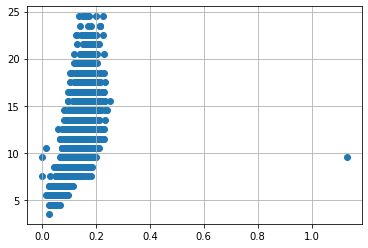

In [59]:
var = 'Height'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)
df.drop(df[(df['Height'] > 0.4) &
          (df['age'] < 15)].index, inplace = True)
df.drop(df[(df['Height']<0.4) & (
df['age'] > 25)].index, inplace = True)

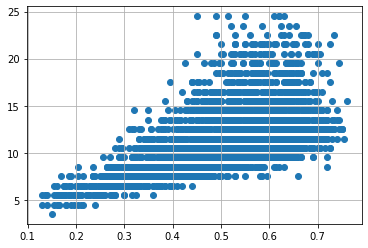

In [60]:
var = 'Length'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

df.drop(df[(df['Length'] <0.1) &
          (df['age'] < 5)].index, inplace = True)
df.drop(df[(df['Length']<0.8) & (
df['age'] > 25)].index, inplace = True)
df.drop(df[(df['Length']>=0.8) & (
df['age'] < 25)].index, inplace = True)

In [61]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

In [62]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [63]:
categorical_features

Index([], dtype='object')

ENCODING

In [64]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
print(df.Length.value_counts())

0.625    93
0.575    93
0.550    93
0.580    92
0.620    85
         ..
0.220     2
0.755     1
0.150     1
0.135     1
0.760     1
Name: Length, Length: 126, dtype: int64


In [65]:
x=df.iloc[:,:5]
x

,Length,Diameter,Height,Whole weight,Shucked weight
0,0.455,0.365,0.095,0.5140,0.2245
1,0.350,0.265,0.090,0.2255,0.0995
2,0.530,0.420,0.135,0.6770,0.2565
3,0.440,0.365,0.125,0.5160,0.2155
4,0.330,0.255,0.080,0.2050,0.0895
...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700
4173,0.590,0.440,0.135,0.9660,0.4390
4174,0.600,0.475,0.205,1.1760,0.5255
4175,0.625,0.485,0.150,1.0945,0.5310


In [66]:
y=df.iloc[:,5:]
y

,Viscera weight,Shell weight,age,Sex_F,Sex_I,Sex_M
0,0.1010,0.1500,16.5,0,0,1
1,0.0485,0.0700,8.5,0,0,1
2,0.1415,0.2100,10.5,1,0,0
3,0.1140,0.1550,11.5,0,0,1
4,0.0395,0.0550,8.5,0,1,0
...,...,...,...,...,...,...
4172,0.2390,0.2490,12.5,1,0,0
4173,0.2145,0.2605,11.5,0,0,1
4174,0.2875,0.3080,10.5,0,0,1
4175,0.2610,0.2960,11.5,1,0,0


10.Train , Test , Split

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

11.Model building

In [68]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

12 , 13 Train and Test the model

In [69]:
x_test[0:5]

,Length,Diameter,Height,Whole weight,Shucked weight
2503,0.300,0.230,0.075,0.1270,0.0520
509,0.560,0.445,0.155,0.8735,0.3005
1863,0.520,0.415,0.140,0.6375,0.3080
1748,0.705,0.545,0.170,1.5800,0.6435
647,0.480,0.375,0.145,0.7770,0.2160


In [70]:
y_test[0:5]

,Viscera weight,Shell weight,age,Sex_F,Sex_I,Sex_M
2503,0.0300,0.0345,7.5,0,1,0
509,0.2090,0.2750,17.5,0,1,0
1863,0.1335,0.1680,10.5,0,1,0
1748,0.4565,0.2650,12.5,1,0,0
647,0.1300,0.1700,10.5,0,0,1


# 9 feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)

In [72]:
mlrpred=mlr.predict(x_test[0:9])

In [73]:
mlrpred

array([[ 0.02595777,  0.03971976,  8.15597504,  0.06120408,  0.76008181,
         0.17871411],
       [ 0.19488246,  0.28746106, 14.1011683 ,  0.42785754,  0.19459159,
         0.37755088],
       [ 0.13748579,  0.18662375, 10.87125633,  0.28127708,  0.37171143,
         0.34701148],
       [ 0.34872359,  0.44653752, 14.37228425,  0.55510701, -0.07827321,
         0.5231662 ],
       [ 0.17548648,  0.26837187, 14.14320641,  0.39654563,  0.26961142,
         0.33384296],
       [ 0.22193719,  0.26930598, 10.89939884,  0.32669293,  0.27545369,
         0.39785338],
       [ 0.17409593,  0.23057989, 11.23509057,  0.33206997,  0.27119338,
         0.39673665],
       [ 0.15979414,  0.24080191, 13.17583353,  0.37936875,  0.25966507,
         0.36096618],
       [ 0.24117535,  0.31059679, 12.35462106,  0.41960426,  0.11908188,
         0.46131385]])

# Measure the performance using metrics

In [74]:
from sklearn.metrics import r2_score
r2_score(mlr.predict(x_test),y_test)

-3.242655882914024